# Inferential Statistics II - Bootstrapping

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Medical Charge Data Set

In [67]:
medical = pd.read_csv('data/insurance2.csv')

In [68]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you would like to verify your calculations and check you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__1:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__ We perform a one variable permutation test in which we draw a bootstrap sample with replacement of the same size as the data itself, 10,000 times, to create a sampling distribution of sample mean. We then create a 95% confidence interval for this distribution.

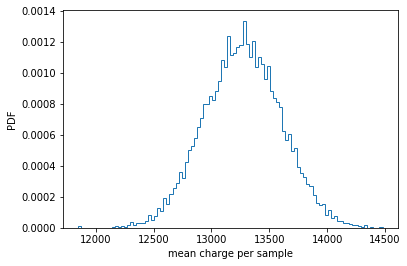

array([12624.86211913])

In [69]:
np.random.seed(47)
N_rep = 10000

df = medical

charges = df['charges']
sampling_distribution_of_the_mean = np.empty(N_rep)

# create sampling distribution
for i in range(N_rep):
    draw = np.random.choice(charges, size=len(charges))
    mean = np.mean(draw)
    sampling_distribution_of_the_mean[i] = mean

# plot sampling distributon as a histogram
plt.hist(sampling_distribution_of_the_mean, bins=int(np.sqrt(len(sampling_distribution_of_the_mean))), density=True, histtype='step')
plt.xlabel('mean charge per sample')
plt.ylabel('PDF')
plt.show()

# print results
interval = np.percentile(sampling_distribution_of_the_mean, [2.5])
mean = np.mean(sampling_distribution_of_the_mean)
interval

As expected, the sampling distribution of the mean is a normal distribution. According to the 95% confidence interval, the true value of the mean charge will be greater than or equal to \\$12,624.86 95\% of the time; that is, we can say with 95% confidence that

\begin{equation}
\mu_{\bar x} \ge $12,624.86
\end{equation}

If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

__2:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

In [70]:
# separate into insurend and uninsured groups
insured = medical[medical['insuranceclaim'] == 1]
uninsured = medical[medical['insuranceclaim'] == 0]

insured_charges = insured['charges']
uninsured_charges = uninsured['charges']

In [71]:
# function for getting a bootstrap replicate
def calculate_replicate(insured_charges, uninsured_charges):
    insured_sample = np.random.choice(insured_charges, size=len(insured_charges))
    insured_std = np.std(insured_sample)
    uninsured_sample = np.random.choice(uninsured_charges, size=len(uninsured_charges))
    uninsured_std = np.std(uninsured_sample)
    return insured_std - uninsured_std

In [72]:
# create a distribution of 10,000 replicates
N_rep = 10000

std_diff_replicates = np.empty(N_rep)
for i in range(10000):
    std_diff_replicates[i] = calculate_replicate(insured_charges, uninsured_charges)
    

In [73]:
# calculate the 95% confidence interval

interval = np.percentile(std_diff_replicates, [2.5, 97.5])
interval

array([6676.06177337, 8486.94648372])

With 95% confidence, the true value of the difference in standard deviations between insured and uninsured patients lies between \\$6,678.65 and \\$8,513.05.

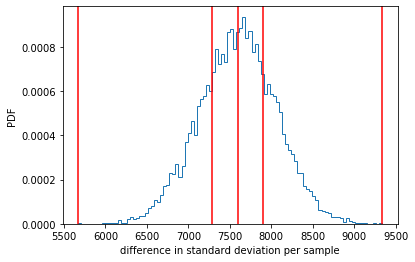

In [74]:
# plot the histogram with marked percentiles

# histogram
plt.hist(std_diff_replicates, bins=int(np.sqrt(len(sampling_distribution_of_the_mean))), density=True, histtype='step')
plt.xlabel('difference in standard deviation per sample')
plt.ylabel('PDF')

# calculate and plot percentile lines
percentiles = np.array([0, 25, 50, 75, 100])
ptiles_std_diff = np.percentile(std_diff_replicates, percentiles)
[plt.axvline(x, color='r') for x in ptiles_std_diff]

plt.show()

$H_0$: There isn't a difference in the standard deviations of insured and uninsured patients' charges.

\begin{equation}
\sigma_{insured} - \sigma_{uninsured} = 0
\end{equation}

$H_a$: There is a significant difference.

\begin{equation}
\sigma_{insured} - \sigma_{uninsured} \ne 0
\end{equation}

In this case, we should reject the null hypothesis, because the confidence interval shows that we get a value substantially higher than 0 in 95% of the trials.

__3:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__ 

$H_0$: There isn't a difference in the standard deviations of insured and uninsured patients' charges.

\begin{equation}
\sigma_{insured} - \sigma_{uninsured} = 0
\end{equation}

$H_a$: There is a significant difference.

\begin{equation}
\lvert\sigma_{insured} - \sigma_{uninsured}\rvert \gt 0
\end{equation}

To simulate the null hypothesis, we perform a two group permutation test. We permute the two groups into two new groups with identical standard deviations, and then we calculate 10,000 replicates from these groups. Then we see what percent of the time we got a difference equal to or larger than the observed difference.

In [75]:
# calculate the observed value
observed_std_diff = np.std(insured_charges) - np.std(uninsured_charges)
observed_std_diff

7596.256408655182

There's an observed difference of standard deviations between insured and uninsured patients of \\$7,596.26.

In [76]:
# permute the groups
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [77]:
# create a bootstrap replicate from the two groups
def get_bootstrap_replicate(group1, group2):
    permuted_1, permuted_2 = permutation_sample(group1, group2)
    return abs(np.std(permuted_1) - np.std(permuted_2))

In [78]:
# calcualte 10000 replicates
N_rep = 10000
bs_replicates = np.empty(N_rep)

for i in range(N_rep):
    bs_replicates[i] = get_bootstrap_replicate(insured_charges, uninsured_charges)

bs_replicates

array([  79.86352244,  126.25767593, 1047.9453537 , ..., 1162.83086368,
        118.69369249,  674.46046834])

In [79]:
# calculate the p value
p = np.sum([bs_replicates >= observed_std_diff])/len(bs_replicates)
p

0.0

We get a value as extreme or more extreme than the observed value 0% of the time, well within our $\alpha$ of 5%. For this reason, we should reject the null hypothesis that there is no difference in standard deviations between the charges for insured and uninsured patients.

__4:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__

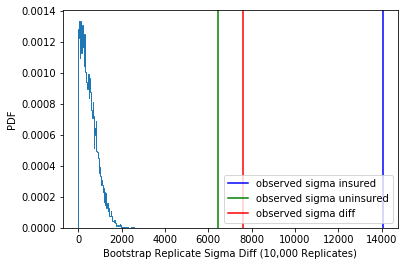

In [80]:
# plot the histogram with observed values marked
# histogram
plt.hist(bs_replicates, bins=int(np.sqrt(len(sampling_distribution_of_the_mean))), density=True, histtype='step')
plt.xlabel('Bootstrap Replicate Sigma Diff (10,000 Replicates)')
plt.ylabel('PDF')

# calculate and plot observed value lines
# percentiles = np.array([0, 25, 50, 75, 100])
# ptiles_std_diff = np.percentile(std_diff_replicates, percentiles)
plt.axvline(np.std(insured_charges), color='b')
plt.axvline(np.std(uninsured_charges), color='g')
plt.axvline(observed_std_diff, color='r')
plt.legend(('observed sigma insured', 'observed sigma uninsured', 'observed sigma diff'), loc='lower right')

plt.show()

__5:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__ The previous assignment's t test calculated a p value of 0.000130171652092872 for the null hypothesis that insured and uninsured groups had the same mean charges. This value indicates that we would get the observed value about 1 in every 10,000 trials; however, the bootstrap test p-value just measured for the null hypothesis that insured and uninsured groups have the same standard deviation calculated was even smaller: we saw the observed result in 0 trials out of 10,000. Moreover, the confidence interval calculated on the observed data indicate that it would be exceptionally rare to see the observed value result from a permutation hypothesis test. I would probably not want to try to perform enough bootstrap replicates to observe a random difference as large as that observed in the data.

__6:__ Remember the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ The bootstrap test has shown that the two groups' standard deviations vary substantially, which means the two groups variances also differ substantially. This means we would need to use the variance of the pooled t-test that doesn't assume the two groups to have the same variance.

__7:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real world consequence of rejecting the null hypothesis?

__A:__ A two-sided permutation test as above would be appropriate for an A/B test. The test statistic would now be the observed proportion of people who clicked through in condition B. The replicate function would permute groups A and B into two groups equally likely to have clicked through and return the proportion of people in condition B who clicked through. The p value would describe the likelihood of seeing the observed click-through rate in condition B given that people are equally likely to click through in conditions A and B.

$H_0$: The same proportion of people click through under both the current and new algorithms.

$H_a$: A higher proportion of people click through under the new algorithm than under the old.

The real-world consequence of rejecting the null hypothesis in this case would be to confirm that the new algorithm results in a higher click-through rate.